# 1. iris 데이터로 Kmeans clustering

In [3]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

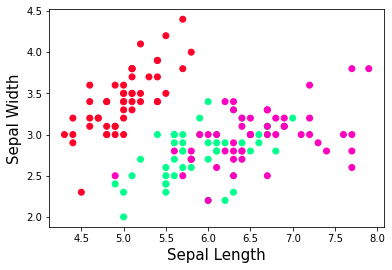

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_rainbow')
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)

In [8]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state = 10)
# n_jobs : 기본적인 병렬처리
km.fit(X)

KMeans(n_clusters=3, n_jobs=4, random_state=10)

In [9]:
centers = km.cluster_centers_
print(centers)

[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]


Text(0.5, 1.0, 'Predicted')

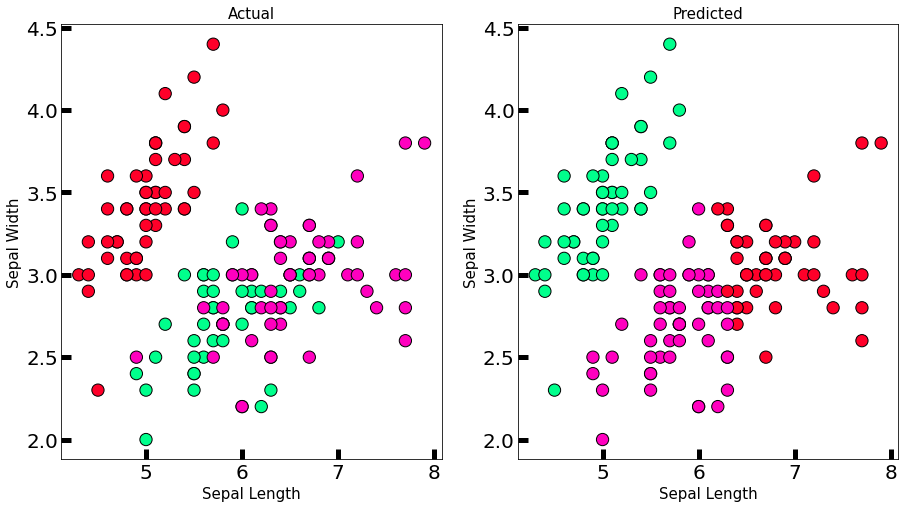

In [13]:
new_labels = km.labels_

fig, axes = plt.subplots(1, 2, figsize = (15, 8))
axes[0].scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_rainbow',
                    edgecolor = 'k', s = 150)
axes[1].scatter(X[:, 0], X[:, 1], c = new_labels, cmap = 'gist_rainbow',
                    edgecolor = 'k', s = 150)

axes[0].set_xlabel('Sepal Length', fontsize = 15)
axes[0].set_ylabel('Sepal Width', fontsize = 15)
axes[1].set_xlabel('Sepal Length', fontsize = 15)
axes[1].set_ylabel('Sepal Width', fontsize = 15)

axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)

axes[0].set_title('Actual', fontsize = 15)
axes[1].set_title('Predicted', fontsize = 15)

# 2. 2차원의 가상 데이터로 Kmeans clustering

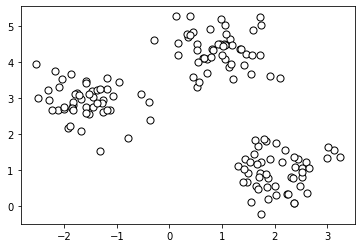

In [14]:
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3,
                  cluster_std = 0.5, shuffle = True, random_state = 0)

#plot
plt.scatter(X[:, 0], X[:, 1], c = 'white', marker = 'o',
            edgecolors = 'black', s = 50)
plt.show()

In [16]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300,
            tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

In [17]:
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2], dtype=int32)

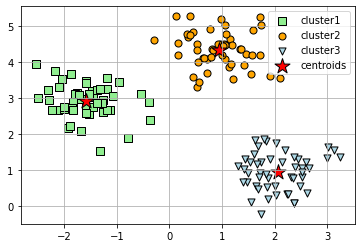

In [21]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen',
            marker = 's', edgecolors = 'black', label = 'cluster1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange',
            marker = 'o', edgecolors = 'black', label = 'cluster2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue',
            marker = 'v', edgecolors = 'black', label = 'cluster3')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250,
            marker = '*', c = 'red', edgecolors = 'black', label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

## 2-1. k = 4로 할 경우

In [19]:
km2 = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 300,
            tol = 1e-04, random_state = 0)
y_km2 = km2.fit_predict(X)

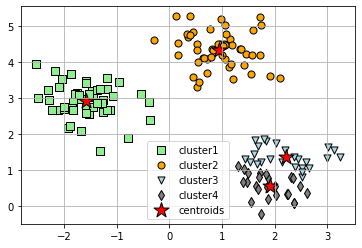

In [22]:
plt.scatter(X[y_km2 == 0, 0], X[y_km2 == 0, 1], s = 50, c = 'lightgreen',
            marker = 's', edgecolors = 'black', label = 'cluster1')
plt.scatter(X[y_km2 == 1, 0], X[y_km2 == 1, 1], s = 50, c = 'orange',
            marker = 'o', edgecolors = 'black', label = 'cluster2')
plt.scatter(X[y_km2 == 2, 0], X[y_km2 == 2, 1], s = 50, c = 'lightblue',
            marker = 'v', edgecolors = 'black', label = 'cluster3')
plt.scatter(X[y_km2 == 3, 0], X[y_km2 == 3, 1], s = 50, c = 'gray',
            marker = 'd', edgecolors = 'black', label = 'cluster4')

# plot the centroids
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], s = 250,
            marker = '*', c = 'red', edgecolors = 'black', label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

## 2-2. 최적 k값 정하기 - elbow method

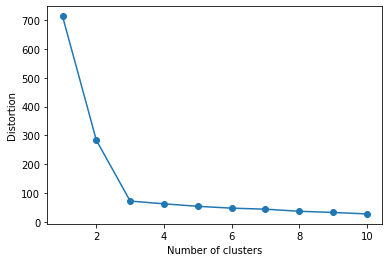

In [23]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300,
            tol = 1e-04, random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_) # km.inertia_ : 군집 내 분산
    
# plot
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# 3. 텍스트 분류에 k-means clustering

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.","hello kitty is my favorite character",
             "Merley has the best squooshy kitten belly.","Is Google translator so good?","google google"
             "google Translate app is incredible.","My dog s name is Kong","dog dog dog","cat cat"
             "If you open 100 tab in google you get a smiley face.","Kong is a very cute and lovely dog",
             "Best cat photo I've ever taken.","This is a cat house"
             "Climbing ninja cat kitty.","What's your dog's name?","Cat s paws look like jelly",
             "Impressed with google map feedback.","I want to join google","You have to wear a collar when you walk the dog",
             "Key promoter extension for google Chrome.","Google is the best company","Google researcher"]

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(documents)

In [25]:
X

<19x55 sparse matrix of type '<class 'numpy.float64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [26]:
true_k = 3
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [27]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [30]:
order_centroids

array([[ 5, 29,  7, 16, 21, 51, 48, 40, 39, 31, 33, 25, 22, 37, 13, 44,
        41,  4, 32,  3, 15,  0, 38,  6, 45, 47, 19,  9,  8, 10, 17, 11,
        12, 14,  2,  1, 54, 18, 20, 52, 50, 49, 46, 43, 42, 36, 35, 34,
        30, 28, 53, 26, 24, 23, 27],
       [12, 30, 34, 11,  9, 54, 52,  4, 16, 23, 22, 21, 20, 19, 18,  1,
        17, 15,  5, 14, 13, 25,  2, 10,  3,  8,  7,  6, 24, 27, 26, 41,
        51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 40, 53, 39, 38, 37, 36,
        35, 33, 32, 31, 29, 28,  0],
       [19,  3, 43, 10, 50, 18, 26, 53, 23, 17, 35, 20, 24, 14, 49, 27,
         8, 42,  1, 36, 28,  2, 46,  4,  5,  6,  9, 11, 15, 13, 12,  7,
        16, 54, 21, 39, 52, 51, 48, 47, 45, 44, 41, 40, 38, 22, 37, 34,
        33, 32, 31, 30, 29, 25,  0]])

In [31]:
terms

['100',
 'app',
 'belly',
 'best',
 'came',
 'cat',
 'catif',
 'character',
 'chrome',
 'collar',
 'company',
 'cute',
 'dog',
 'eating',
 'extension',
 'face',
 'favorite',
 'feedback',
 'good',
 'google',
 'googlegoogle',
 'hello',
 'houseclimbing',
 'impressed',
 'incredible',
 'jelly',
 'join',
 'key',
 'kitten',
 'kitty',
 'kong',
 'like',
 'little',
 'look',
 'lovely',
 'map',
 'merley',
 'ninja',
 'open',
 'paws',
 'photo',
 'play',
 'promoter',
 'researcher',
 'restaurant',
 'smiley',
 'squooshy',
 'tab',
 'taken',
 'translate',
 'translator',
 've',
 'walk',
 'want',
 'wear']

In [32]:
model.labels_

array([0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2],
      dtype=int32)

In [33]:
[x for x, y in zip(documents, model.labels_) if y == 0]
# cat, kitty

['This little kitty came to play when I was eating at a restaurant.',
 'hello kitty is my favorite character',
 'cat catIf you open 100 tab in google you get a smiley face.',
 "Best cat photo I've ever taken.",
 'This is a cat houseClimbing ninja cat kitty.',
 'Cat s paws look like jelly']

In [34]:
[x for x, y in zip(documents, model.labels_) if y == 1]
# dog

['My dog s name is Kong',
 'dog dog dog',
 'Kong is a very cute and lovely dog',
 "What's your dog's name?",
 'You have to wear a collar when you walk the dog']

In [35]:
[x for x, y in zip(documents, model.labels_) if y == 2]
# google

['Merley has the best squooshy kitten belly.',
 'Is Google translator so good?',
 'google googlegoogle Translate app is incredible.',
 'Impressed with google map feedback.',
 'I want to join google',
 'Key promoter extension for google Chrome.',
 'Google is the best company',
 'Google researcher']

In [36]:
Y1 = vectorizer.transform(["chrome browser to open."]) # google
pred1 = model.predict(Y1)
print(pred1)

Y2 = vectorizer.transform(["I want to have a dog"]) # dog
pred2 = model.predict(Y2)
print(pred2)

Y3 = vectorizer.transform(["My cat is hungry."]) # cat
pred3 = model.predict(Y3)
print(pred3)

[2]
[1]
[0]
